In [46]:
%run graph_operator.py

In [47]:
if __name__ == "__main__":
    path = nx.path_graph(1000)
    p1 = GraphOperator(path, "combinatorial laplacian")

In [53]:
p1

Graph, cached = True
path_graph(1000)
combinatorial laplacian

In [55]:
p1.laplacian

<1000x1000 sparse matrix of type '<type 'numpy.float64'>'
	with 2998 stored elements in Compressed Sparse Row format>

In [57]:
p1.matrix_type

'combinatorial laplacian'

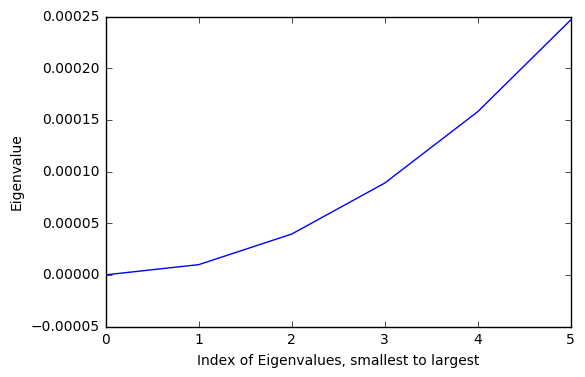

In [58]:
p1.plot_eigenvals()
plt.show()

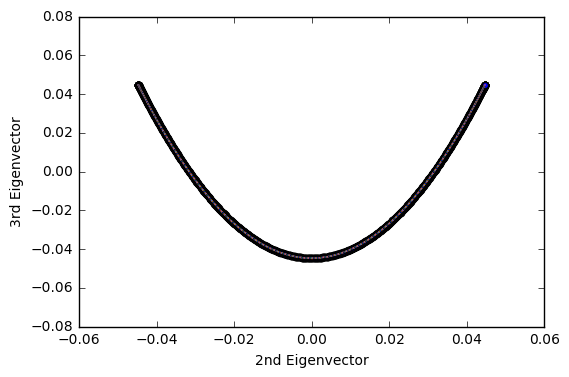

In [59]:
p1.plot_eigenvectors()
plt.show()

In [60]:
lob = nx.random_lobster(5, 0.6, 0.9, seed = 37)
g1 = GraphOperator(lob, "adjacency")
g2 = GraphOperator(lob, "combinatorial laplacian")
g3 = GraphOperator(lob, "normalized laplacian")

In [61]:
g1

Graph, cached = True
random_lobster(5,0.6,0.9)
adjacency

In [64]:
g2.eigvecs[:,1]

array([-0.35625041, -0.25124631, -0.12528084,  0.01113677,  0.14427183,
        0.23488306,  0.25626298, -0.43153269, -0.47081237,  0.01349017,
        0.0147181 ,  0.17475913,  0.19066634,  0.28451818,  0.31041606])

In [65]:
[g2.eigvecs[:,1][i] for i in range(len(g2.eigvecs[:,1])) if g2.eigvecs[:,1][i] >=0]

[0.011136767986363514,
 0.14427183250285153,
 0.23488306155503588,
 0.25626297573693252,
 0.013490172231596048,
 0.014718096981473852,
 0.17475912859229739,
 0.19066634279101405,
 0.28451817964977727,
 0.31041606357478008]

In [66]:
[g2.eigvecs[:,1][i] for i in range(len(g2.eigvecs[:,1])) if g2.eigvecs[:,1][i] < 0]

[-0.35625041318314732,
 -0.25124631299615491,
 -0.12528083672692214,
 -0.43153268859534372,
 -0.47081237010055843]

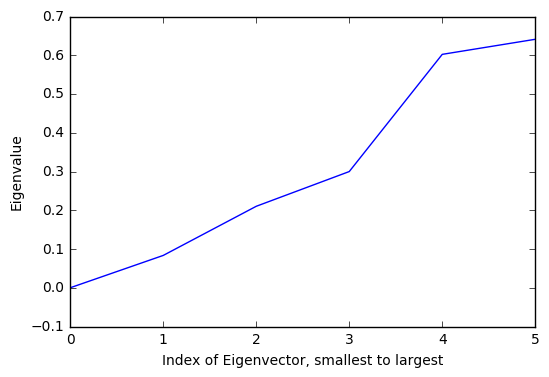

In [5]:
g2.plot_eigenvals()
plt.show()

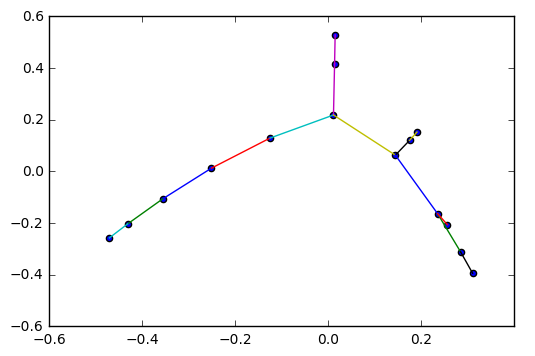

In [34]:
g2.plot_eigenvectors()
plt.show()

In [35]:
g3.compute()

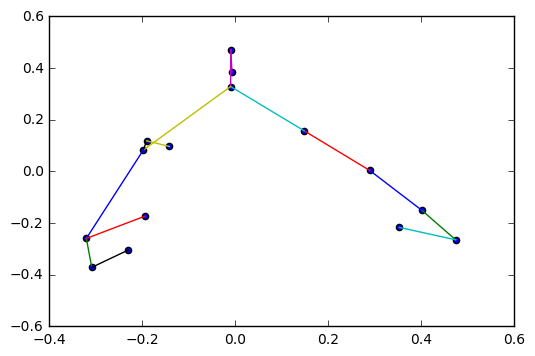

In [36]:
g3.plot_eigenvectors()
plt.show()

In [37]:
vec = g2.eigvecs[:,1]

len(vec)

15

In [38]:
"""
def partition(secondEigVec, standardVal = 0):
    A = []
    B = []
    for i in range(0, len(secondEigVec)):
        if (secondEigVec[i] >= standardVal):
            A.append(i)
        else:
            B.append(i)
    return (A,B)
"""

'\ndef partition(secondEigVec, standardVal = 0):\n    A = []\n    B = []\n    for i in range(0, len(secondEigVec)):\n        if (secondEigVec[i] >= standardVal):\n            A.append(i)\n        else:\n            B.append(i)\n    return (A,B)\n'

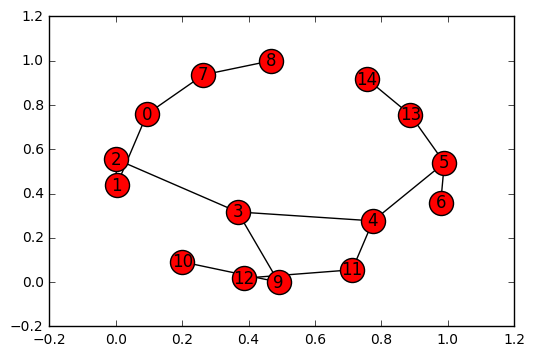

In [39]:
(A, C) = g2.partition()
g2.draw_graphWithLabel()
plt.show()

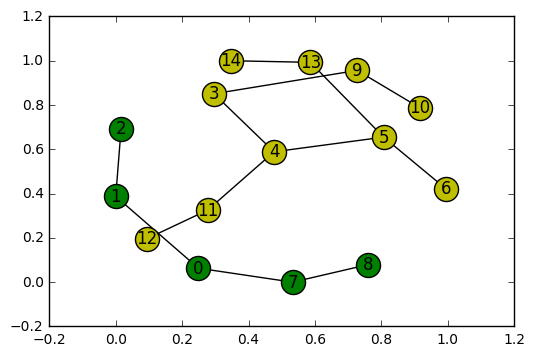

In [40]:
g2.draw_partitionGraph(A, C)
plt.show()

In [41]:
#edgelist = g2._graph.edges()

In [42]:
from networkx.algorithms import bipartite

In [43]:
#nx.draw(g2._graph)
#plt.show()

In [17]:
B = nx.Graph()
B.add_nodes_from(A, bipartite=0)
B.add_nodes_from(C, bipartite=1)
B.add_edges_from(edgelist)

In [18]:
# bipartite.color(B)
color = bipartite.color(B)
pos = nx.spring_layout(B)
#color

In [19]:
nx.set_node_attributes(g2._graph, 'bipartite', color)

In [20]:
nx.draw_networkx_nodes(g2._graph, pos, nodelist = A, node_color='y')
nx.draw_networkx_nodes(g2._graph, pos, nodelist = C, node_color='b')
nx.draw_networkx_edges(g2._graph, pos, edgelist=removeEdge(edgelist, A, C))
plt.show()

NameError: name 'removeEdge' is not defined

In [21]:
g2._graph.nodes()
#g2._graph.edges()
#edgelist
for (i,j) in edgelist:
    print(i,"lalala", j)

(0, 'lalala', 1)
(0, 'lalala', 7)
(1, 'lalala', 2)
(2, 'lalala', 3)
(3, 'lalala', 9)
(3, 'lalala', 4)
(4, 'lalala', 11)
(4, 'lalala', 5)
(5, 'lalala', 13)
(5, 'lalala', 6)
(7, 'lalala', 8)
(9, 'lalala', 10)
(11, 'lalala', 12)
(13, 'lalala', 14)


In [22]:
def removeEdge(edgelist, A, B):
    for (i,j) in edgelist:
        if ((i in A and j in B) or (i in B and j in A)):
            edgelist.remove((i,j))
    return edgelist